## UPF Expeiments
    Feb2024

In [1]:

import os
import pandas as pd
import numpy as np
from sklearn.metrics import (accuracy_score, f1_score, precision_score, 
                             recall_score, roc_auc_score, mean_squared_error, r2_score)
from sklearn.model_selection import train_test_split
import xgboost as xgb
import math
import shap
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from config import region_mapping, set1, to_model_a, to_model_c, to_model_ac, to_model, set10

path = '/Users/jerzybala/Desktop/Simulation Experiments Aug-Sep 2023/PROCESSED_FOOD_Dec2023.csv'
path_temp = '/Volumes/2TB Ext/BrainBaseMHQ/mhm_data_2024-02-03_17-00-42_from jan2023.csv'
path_temp_processed = '/Volumes/2TB Ext/BrainBaseMHQ/GMP_data_2023_to_jan2024.csv'
path1 = '/Users/jerzybala/Desktop/PROCESSED_FOOD_Dec2023.csv'



df = pd.read_csv(path, low_memory=False)

df.loc[:, 'Processed food in diet'] = df['Processed food in diet'].replace({
            'Rarely/never': 'Rarely/Never',
            'A few times in a day': 'Several times a day',
            'Several days a week': 'A few times a week',
            'Many times in a day': 'Several times a day',
            'At least once a day': 'Several times a day'
        })


print(f"Data loaded. Shape: {df.shape}")

df_org=df.copy()



/var/folders/fh/2yy079jj39d78d0mx1nh7rkm0000gn/T/ipykernel_11731/747780167.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
#df.columns.to_list()

In [ ]:
import pandas as pd

import pandas as pd
from collections import Counter

# Assuming 'dd' is your DataFrame and 'column_name' is the column of interest.
# Replace 'column_name' with the actual name of your column.

# Initialize a Counter object to count substring occurrences.
substring_counts = Counter()

for entry in df['Adult traumas']:  # Make sure to replace 'column_name' with the actual column name.
    if isinstance(entry, str):
        substrings = entry.split('|')  # Splitting by '|', adjust as needed.
        substring_counts.update(substrings)

# Getting the 50 most common substrings.
most_common_50 = substring_counts.most_common(50)

# Printing each substring and its frequency, one per line.
for substring, count in most_common_50:
    print(f"{substring}: {count}")


In [2]:
df['Processed food in diet'].value_counts()


Rarely/Never           154211
A few times a month    125715
A few times a week      85120
Once a day              20110
Several times a day     16526
Name: Processed food in diet, dtype: int64

In [ ]:
df['Processed food in diet'].value_counts()


In [ ]:

df=df_org.copy()


df['MHQ_Sign'].value_counts().plot(kind='bar', title='Count (MHQ_Sign)')
plt.show()

df.loc[df['Overall MHQ'].between(0, 20), 'MHQ_Sign'] = 0


df['MHQ_Sign'].value_counts().plot(kind='bar', title='Count (MHQ_Sign) after')
plt.show()


In [ ]:

df['Country'].value_counts().head(20).plot(kind='bar')
plt.show()




In [ ]:
df.columns.tolist()


In [ ]:
df.columns.tolist()

In [ ]:

multi_col = [
'Substance Use',
'Childhood traumas',
'Adult traumas']

for ucol in multi_col:
    u= df[ucol].unique()
    #print(f"{ucol} unique values: {u}")
    print(f"{ucol} number: {len(u)}")   
    
    
print(len(df))




In [ ]:
df['Country'].value_counts().head(20).plot(kind='bar')



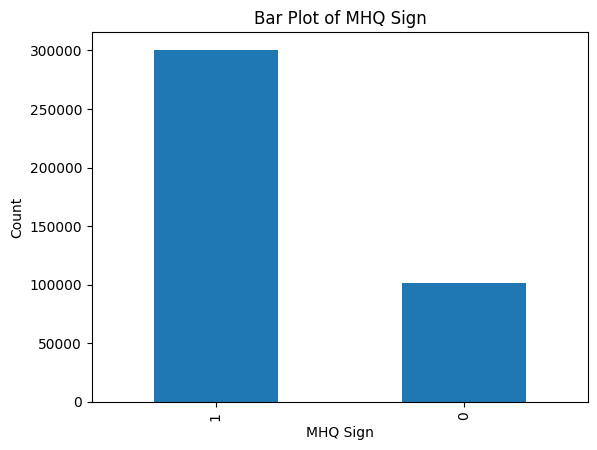

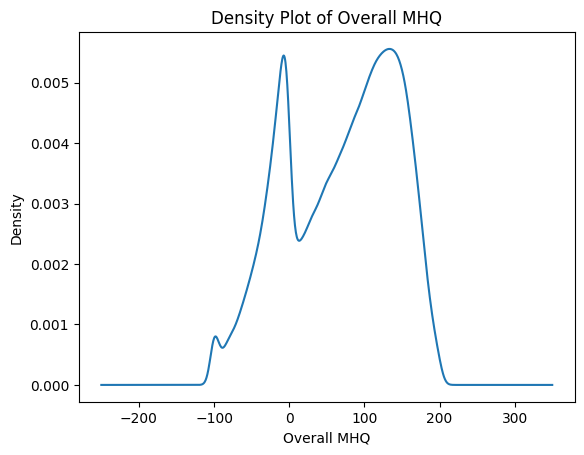

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`


In [3]:


df['MHQ_Sign'].value_counts().plot(kind='bar')
plt.xlabel('MHQ Sign')
plt.ylabel('Count')
plt.title('Bar Plot of MHQ Sign')
plt.show()


df['Overall MHQ'].plot.density()
plt.xlabel('Overall MHQ')
plt.ylabel('Density')
plt.title('Density Plot of Overall MHQ')
plt.show()


df.loc[:, 'Processed food in diet'] = df['Processed food in diet'].replace({
    'A few times a week': 3,
    'Rarely/Never': 1,
    'A few times a month': 2,
    'Several times a day': 5,
    'Once a day': 4
})


## Frequency feature numerical codding 

In [4]:


frequency_features = [
'Frequency of getting a good nights sleep',
'Frequency of doing exercise',
'Processed food in diet',
'Frequency of Socializing']

for f in frequency_features:
    print(f"{f}: {df[f].unique()}") 




df.loc[:, 'Frequency of getting a good nights sleep'] = df['Frequency of getting a good nights sleep'].replace({
    'Some of the time': 3,  # Occasional good sleep might be better than "Most days" depending on interpretation
    'Most of the time': 1,  # Most frequent good sleep
    'All of the time': 0,   # Always getting a good night's sleep
    'Hardly ever': 4,       # Rarely getting a good night's sleep
    'Most days': 2          # Assuming "Most days" is similar to "Some of the time", but could be adjusted based on interpretation
})


df.loc[:, 'Frequency of doing exercise'] = df['Frequency of doing exercise'].replace({
    'Less than once a week': 5,
    'Rarely/Never': 6,
    'Few days a week': 3,
    'Once a week': 4,
    'Every day': 1,
    'Some days of the week': 2, # Assuming this is less than "Every day" but more than "Few days a week"
    'Several days a week': 3    # Similar to "Few days a week"
})



df.loc[:, 'Processed food in diet'] = df['Processed food in diet'].replace({
    'A few times a week': 3,
    'Rarely/Never': 1,
    'A few times a month': 2,
    'Several times a day': 5,
    'Once a day': 4
})



df.loc[:, 'Frequency of Socializing'] = df['Frequency of Socializing'].replace({ 
    '1-3 times a month': 2,
    'Rarely/Never': 4,
    'Once a week': 3,
    'Several days a week': 1
})




Frequency of getting a good nights sleep: ['Some of the time' 'Most of the time' 'All of the time' 'Hardly ever'
 'Most days']
Frequency of doing exercise: ['Less than once a week' 'Rarely/Never' 'Few days a week' 'Once a week'
 'Every day' 'Some days of the week' 'Several days a week']
Processed food in diet: [3 1 2 5 4]
Frequency of Socializing: ['1-3 times a month' 'Rarely/Never' 'Once a week' 'Several days a week']


In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`


In [ ]:
df['Age'].unique()


In [ ]:


df.loc[:, 'Age'] = df['Age'].replace({ 
   
 '18':18,
 '18-24':21,
 '19':19,
 '20':20,
 '21-24':22,
 '25-34':30,
 '35-44':40,
 '45-54':50,
 '55-64':60,
 '65-74':70,
 '75-84':80,
 '85+':85
})



### Execute the following code to create a new dataframe with only the features of interest


## Function Definitions

In [5]:
def segment_and_prepare_df(df, countries=None, age_groups=None, drop_list=None):
    """
    Segments the DataFrame based on specific countries and age groups, and then drops specified columns.
    
    Parameters:
    - df: DataFrame to be processed.
    - countries: List of countries for segmentation. If None, no country-based segmentation is applied.
    - age_groups: List of age groups for segmentation. If None, no age-based segmentation is applied.
    - drop_list: List of columns to be dropped from the DataFrame.
    
    Returns:
    - A DataFrame that has been segmented and had specified columns dropped.
    """
    # Segment DataFrame based on provided countries and age groups
    segmented_df = df.copy()
    if countries is not None:
        segmented_df = segmented_df[segmented_df['Country'].isin(countries)]
    if age_groups is not None:
        segmented_df = segmented_df[segmented_df['Age'].isin(age_groups)]
    
    # Drop specified columns if drop_list is provided
    if drop_list is not None:
        segmented_df = segmented_df.drop(columns=drop_list)
    
    return segmented_df
#================================================================================================


def encode_features(df, categorical_features):
    """Encodes categorical features using one-hot encoding."""
    encoded_features = pd.get_dummies(df[categorical_features])
    return pd.concat([df.drop(columns=categorical_features), encoded_features], axis=1)
#================================================================================================


def prepare_dataset(df, target_classification, target_regression):
    """Prepares the dataset by dropping specified columns, encoding categorical features, and splitting into features and targets."""
    #df_filtered = drop_columns(df, drop_list)
    categorical_features = df.select_dtypes(include=['object']).columns
    df_filtered = encode_features(df, categorical_features)
    
    X = df_filtered.drop(columns=[target_classification, target_regression], axis=1)
    y_classification = df_filtered[target_classification]
    y_regression = df_filtered[target_regression]
    
    return X, y_classification, y_regression

#================================================================================================

def split_dataset(X, y_classification, y_regression, test_size=0.3, random_state=42):
    """Splits the dataset into training and testing sets for both classification and regression tasks."""
    X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=test_size, random_state=random_state)
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train_class, y_test_class, X_train_reg, X_test_reg, y_train_reg, y_test_reg

#================================================================================================





In [ ]:
df_features = df[set10].copy()
df_features.columns.tolist()


## Selecting data with feature subset and constructing new features

In [6]:



df_features = df[set10].copy()


drop_list1 = [

    'Country',

    'Household Income',
    # 'Education',
    # 'Employment',
    # 'Language',

    'ARCHIVED: Smartphone ownership',
    'ARCHIVED: Age of smartphone access',
    'Smartphone allowed in school',
    'Smartphone use in lessons',

    'Smartphone ownership',
    'Friends/classmates smarphone ownership',
    'Age of smartphone usage during school hours',
    'Smartphone usage during class hours',
    'Smartphone usage during break'

]

anglosphere = ['United States', 'United Kingdom', 'Canada', 'Australia', 'New Zealand', 'Ireland']
kraj = ['United States']
kraj2 =['India']
kraj3 = ['Egypt']
kraj4 = ['Mexico']
kraj5 = ['United Kingdom']


wiek = ['18-24', '21-24', '18', '19', '20']
wiek2 = ['55-64','45-54']
wiek3=[22, 18, 19, 20, 21]


# Segment and prepare the DataFrame
prepared_df = segment_and_prepare_df(df_features, countries=anglosphere, age_groups=None, drop_list=drop_list1)


# Features construcrs defined in config.py
# 'Legal_Substance_Use'
# 'Interpersonal_Trauma'
# 'Life_Adversities'


from config import Legal_Substance_Use, Interpersonal_Trauma, Life_Adversities


prepared_df['Legal_Substance_Use'] = prepared_df[Legal_Substance_Use].sum(axis=1)
prepared_df['Interpersonal_Trauma'] = prepared_df[Interpersonal_Trauma].sum(axis=1)
prepared_df['Life_Adversities'] = prepared_df[Life_Adversities].sum(axis=1)


prepared_df.to_csv('/Users/jerzybala/Desktop/prepared_df.csv', index=False)


prepared_df.shape

# prepared_df.columns.to_list()



(39375, 52)

### CLASS SWITCH

In [ ]:
df['MHQ_Sign'].value_counts().plot(kind='bar')
plt.xlabel('MHQ Sign')
plt.ylabel('Count')
plt.title('Bar Plot of MHQ Sign: ORIGINAL')
plt.show()


prepared_df['MHQ_Sign'] = prepared_df['MHQ_Sign'].replace({1: 0, 0: 1})

prepared_df['MHQ_Sign'].value_counts().plot(kind='bar')
plt.xlabel('MHQ Sign')
plt.ylabel('Count')
plt.title('Bar Plot of MHQ Sign')
plt.show()



In [ ]:
# Include or not to include UPF

prepared_df=prepared_df.drop('Processed food in diet', axis=1)


# RUN ALWAYS

In [7]:
X, y_classification, y_regression = prepare_dataset(prepared_df, 'MHQ_Sign', 'Overall MHQ')

age_values = [
 'Age_18',
 'Age_18-24',
 'Age_19',
 'Age_20',
 'Age_21-24',
 'Age_25-34',
 'Age_35-44',
 'Age_45-54',
 'Age_55-64',
 'Age_65-74',
 'Age_75-84',
 'Age_85+']




#y_classification = y_classification.map({0: 1, 1: 0})



#X = X.drop(columns=age_values, axis=1)   # if decided that 'Age' is not a feature

#X.columns.to_list()

X_train, X_test, y_train, y_test, X_train_reg, X_test_reg, y_train_reg, y_test_reg = split_dataset(
    X, 
    y_classification, 
    y_regression, 
    test_size=0.3, 
    random_state=42
)

X_test_org = X_test.copy()  # a copy to use later for X_test modification

prepared_df.shape

# X.columns.tolist()



(39375, 52)

In [ ]:
X_test_org.columns.tolist()

# STOP
## Execute only if UPF is numerical !!!!!

In [ ]:


# 'A few times a week': 3,
# 'Rarely/Never': 1,
# 'A few times a month': 2,
# 'Several times a day': 5,
# 'Once a day': 4

X_test = X_test_org

values_to_change = [2, 3, 4, 5]
replacement_value = 1
percentage_change = 0.0


def test_model_with_modified_X_test(X_test, y_test, values_to_change, replacement_value, percentage_change):
    # Make sure percentage_change is between 0 and 1
    if not 0 <= percentage_change <= 1:
        raise ValueError("percentage_change must be between 0 and 1.")
    
    # Make sure replacement value is not in values to change
    if replacement_value in values_to_change:
        raise ValueError("replacement_value should not be in values_to_change.")

    # Make a copy of X_test to avoid changing the original data
    X_test_modified = X_test.copy()

    # Iterate over the specified values to be changed
    for value in values_to_change:
        # Find the indices where 'Processed food in diet' equals the current value
        indices = X_test_modified[X_test_modified['Processed food in diet'] == value].index
        # Calculate how many entries to replace
        num_entries_to_replace = int(len(indices) * percentage_change)
        # Randomly select entries to replace
        indices_to_replace = np.random.choice(indices, size=num_entries_to_replace, replace=False)
        # Replace the selected entries with the replacement value
        X_test_modified.loc[indices_to_replace, 'Processed food in diet'] = replacement_value
        
    
    return X_test_modified

X_test = X_test_org
X_test = test_model_with_modified_X_test(X_test, y_test, values_to_change, replacement_value, percentage_change)
X_test['Processed food in diet'].value_counts()





##  Kullback-Leibler Divergence (KLD)


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import entropy


X_test = X_test_org

values_to_change = [2, 3, 4, 5]
replacement_value = 1
percentage_change = 0.3




X_test_new = test_model_with_modified_X_test(X_test, y_test, values_to_change, replacement_value, percentage_change)


def calculate_kld(X_original, X_modified, column_name):
    # Calculate value counts & convert to probability distribution for the original data
    value_counts_original = X_original[column_name].value_counts(normalize=True)
    # Calculate value counts & convert to probability distribution for the modified data
    value_counts_modified = X_modified[column_name].value_counts(normalize=True)
    
    # Ensure both distributions cover the same set of values
    all_values = set(value_counts_original.index).union(set(value_counts_modified.index))
    prob_distribution_original = np.array([value_counts_original.get(value, 0) for value in all_values])
    prob_distribution_modified = np.array([value_counts_modified.get(value, 0) for value in all_values])
    
    # Adding a small constant to avoid division by zero or log of zero issues
    epsilon = 1e-8
    prob_distribution_original += epsilon
    prob_distribution_modified += epsilon
    
    # Compute Kullback-Leibler Divergence
    kld = entropy(prob_distribution_original, prob_distribution_modified)
    
    return kld

# Example usage
kld_value = calculate_kld(X_test, X_test_new, 'Processed food in diet')
print(f"Kullback-Leibler Divergence: {kld_value}")




In [ ]:

import matplotlib.pyplot as plt

kld_values = []

changes =[0.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]   
#changes =[0.0, 30.0, 60.0, 100.0]   

for change in changes:
    X_test_new = test_model_with_modified_X_test(X_test, y_test, values_to_change, replacement_value, change/100)
    kld_value = calculate_kld(X_test, X_test_new, 'Processed food in diet')
    kld_values.append(kld_value)
    print(f"Kullback-Leibler Divergence for {change}%: {kld_value}")

# Plotting the Kullback-Leibler Divergence values
plt.plot(changes, kld_values)
plt.xlabel('UPF % Change')
plt.ylabel('Kullback-Leibler Divergence')
plt.title('Kullback-Leibler Divergence from original UPF distribution')
plt.show()
    


In [ ]:
X_test.shape


In [ ]:
X_test.shape

## Model Generation:  RUN ALWAYS

In [ ]:
import numpy as np
import xgboost as xgb

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix



# X_test = X_test_org
# X_test = test_model_with_modified_X_test(X_test, y_test, values_to_change, replacement_value, 1.0)
# X_test['Processed food in diet'].value_counts()



par1 = {
    'n_estimators': 200, 
    'learning_rate': 0.01,
    'max_depth': 10, 
    'min_child_weight': 1, 
    'gamma': 0.01, 
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Initialize XGBoost classifier and train

model_C = xgb.XGBClassifier(**par1)
model_C.fit(X_train, y_train)

# Predict and evaluate
predictions = model_C.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
auc = roc_auc_score(y_test, model_C.predict_proba(X_test)[:, 1])

print("xgb.XGBClassifier:")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC: {auc}")
print("\n")


# # Assuming 'predictions' and 'y_test' are your predicted and actual labels
# # Calculate precision, recall, and F1 score for class "1"
# precision_class_1 = precision_score(y_test, predictions, pos_label=1)
# recall_class_1 = recall_score(y_test, predictions, pos_label=1)
# f1_class_1 = f1_score(y_test, predictions, pos_label=1)

# print(f"Precision for class '1': {precision_class_1}")
# print(f"Recall for class '1': {recall_class_1}")
# print(f"F1 Score for class '1': {f1_class_1}")
# print("\n")
# print("\n")

# precision_class_0 = precision_score(y_test, predictions, pos_label=0)
# recall_class_0 = recall_score(y_test, predictions, pos_label=0)
# f1_class_0 = f1_score(y_test, predictions, pos_label=0)

# print(f"Precision for class '0': {precision_class_0}")
# print(f"Recall for class '0': {recall_class_0}")
# print(f"F1 Score for class '0': {f1_class_0}")
# print("\n")
# print("\n")


# Step 1: Get predicted probabilities for the positive class (class "1")
probabilities = model_C.predict_proba(X_test)[:, 1]

# Step 2: Apply custom threshold to determine class predictions
# Let's say your custom threshold is 0.6




#threshold = 0.35


custom_predictions = np.where(probabilities > threshold, 1, 0)

# Step 3: Compute metrics with custom predictions
accuracy_custom = accuracy_score(y_test, custom_predictions)
f1_custom = f1_score(y_test, custom_predictions)
precision_custom = precision_score(y_test, custom_predictions)
recall_custom = recall_score(y_test, custom_predictions)



# Calculate precision, recall, and F1 score for both classes
precision_avg = precision_score(y_test, custom_predictions, average='macro')
recall_avg = recall_score(y_test, custom_predictions, average='macro')
f1_avg = f1_score(y_test, custom_predictions, average='macro')

# Print the average scores
print("Average Precision:", precision_avg)
print("Average Recall:", recall_avg)
print("Average F1 Score:", f1_avg)




# AUC can remain the same because it evaluates model performance across all thresholds
auc = roc_auc_score(y_test, probabilities)

print("Metrics with Custom Threshold:",threshold)
# print(f"Accuracy: {accuracy}")
# print(f"F1 Score: {f1_custom}")
# print(f"Precision: {precision}")
# print(f"Recall: {recall}")
# print(f"AUC: {auc}")
# print("\n")
print("\n")


print(accuracy_custom)
print(f1_custom)
print(precision_custom)
print(recall_custom)
print(auc)
print("\n")
print("\n")

# Assuming predictions is your array of predictions from model_C.predict(X_test)

# Count occurrences of 0 and 1
counts = np.bincount(predictions)

# # Assuming your classes are 0 and 1, as typical in binary classification
# num_zeros = counts[0] if 0 in predictions else 0
# num_ones = counts[1] if 1 in predictions else 0

# print(f"Number of 0s classified: {num_zeros}")
# print(f"Number of 1s classified: {num_ones}")


print("**************************************************************************************************")

pd.DataFrame(custom_predictions).value_counts()


# #==================================================================================================


# # Initialize XGBoost regressor and train
# #model = xgb.XGBRegressor()
# # X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.6, random_state=42)


# #model_R = xgb.XGBRegressor()

# model_R = xgb.XGBRegressor(
# n_estimators=200,
# learning_rate=0.1,
# max_depth=6,
# min_child_weight=1,
# gamma=0.2,
# subsample=0.4,
# colsample_bytree=0.8,
# #reg_alpha=10,
# reg_lambda=0.1
# )

# model_R.fit(X_train_reg, y_train_reg)

# # Separate predictions based on the sign of y_test
# predictions = model_R.predict(X_test_reg)

# mse = mean_squared_error(y_test_reg, predictions)
# rmse = math.sqrt(mse)
# r2 = r2_score(y_test_reg, predictions)
# mae = mean_absolute_error(y_test_reg, predictions)

# print("xgb.XGBRegressor:")
# print('mae:', mae)
# print('rmse:',rmse)
# print('r2:', r2)
# print("\n")



In [ ]:
y_test.value_counts()

In [ ]:
threshold = 0.34

In [ ]:
custom_predictions_df = pd.DataFrame(custom_predictions, columns=['Custom_Predictions'])

# Align indices if necessary
custom_predictions_df.index = X_test.index

predicted_X_test = pd.concat([X_test, custom_predictions_df], axis=1)

predicted_X_test.to_csv('/Users/jerzybala/Desktop/UPF predictions/prediction_USA_without_UPF_t1.csv', index=False)


custom_y_test=y_test.copy()

custom_y_test.index = X_test.index


predicted_X_test_with_y = pd.concat([predicted_X_test, custom_y_test], axis=1)      


In [ ]:
#predicted_X_test_with_y.head(50)



count = len(predicted_X_test_with_y[predicted_X_test_with_y['Custom_Predictions'] != predicted_X_test_with_y['MHQ_Sign']])
print(count)




In [ ]:
predicted_X_test_with_y_1 = predicted_X_test_with_y[predicted_X_test_with_y['Custom_Predictions'] != 1]

predicted_X_test_with_y_1['MHQ_Sign'].value_counts()



### Feature Importance

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd
import xgboost as xgb
import numpy as np


scenario = 'Global'


# Create a figure with a specific size
fig, ax = plt.subplots(figsize=(8, 10))  # Width, height in inches

# Plot feature importance for the classifier, using the ax parameter
xgb.plot_importance(model_C, ax=ax,importance_type='gain', max_num_features=50, show_values=False)
plt.title("Feature Importance for XGBoost", fontsize=16)

plt.ylabel('Features')
plt.xlabel('F Score')
plt.show()


# Create a figure with a specific size
fig, ax = plt.subplots(figsize=(8, 10))  # Width, height in inches

# Plot feature importance for the classifier, using the ax parameter
xgb.plot_importance(model_R, ax=ax,importance_type='gain', max_num_features=50, show_values=False)
plt.title("Feature Importance for XGBRegressor", fontsize=16)
plt.ylabel('Features')
plt.xlabel('F Score')
plt.show()


# Step 1: Extract feature importance scores
feature_importance_C = model_C.get_booster().get_score(importance_type='gain')
feature_importance_R = model_R.get_booster().get_score(importance_type='gain')

# Step 2: Convert to DataFrame
df_importance_C = pd.DataFrame(list(feature_importance_C.items()), columns=['Feature', 'Importance'])
df_importance_R = pd.DataFrame(list(feature_importance_R.items()), columns=['Feature', 'Importance'])

# Step 3: Sort the DataFrame
df_importance_C_sorted = df_importance_C.sort_values(by='Importance', ascending=False)
df_importance_R_sorted = df_importance_R.sort_values(by='Importance', ascending=False)

# If you need to limit to the top 30 features, you can do so here
df_importance_C_top30 = df_importance_C_sorted.head(10)
df_importance_R_top30 = df_importance_R_sorted.head(10)

# Assuming df_importance_C and df_importance_R contain all features and their importance

# Write to Excel with pandas ExcelWriter for all features
with pd.ExcelWriter('/Users/jerzybala/Desktop/feature_importance_models_all.xlsx') as writer:
    df_importance_C_sorted.to_excel(writer, sheet_name='Classification_All', index=False)
    df_importance_R_sorted.to_excel(writer, sheet_name='Regression_All', index=False)




In [ ]:
df_importance_C_top30

# Simulated classes

In [ ]:

X_test = X_test_org

prec_replace = 1.0


X_test = test_model_with_modified_X_test(X_test, y_test, values_to_change, replacement_value, prec_replace)

# Obtain predicted probabilities
probabilities = model_C.predict_proba(X_test)

# Select the probabilities of being class 1 (second column)
prob_class_1 = probabilities[:, 1]

# Define your ne7w threshold
threshold = 0.347 # Adjust this threshold as needed

# Apply threshold to classify as 1 or 0
predictions_with_new_threshold = (prob_class_1 >= threshold).astype(int)

# Now, count the occurrences of 0 and 1 with the new threshold
counts = np.bincount(predictions_with_new_threshold)

num_zeros = counts[0]
num_ones = counts[1]

print(f"Number of 0s classified with threshold {threshold}: {num_zeros}")
print(f"Number of 1s classified with threshold {threshold}: {num_ones}")


In [ ]:
unique, counts = np.unique(predictions_with_new_threshold, return_counts=True)
value_counts = dict(zip(unique, counts))

print(value_counts)


In [ ]:

X_test['UPF_Rarely/Never'] = (X_test['Processed food in diet'] == 1).astype(int)
X_test['UPF_A few times a month'] = (X_test['Processed food in diet'] == 2).astype(int)
X_test['UPF_A few times a week'] = (X_test['Processed food in diet'] == 3).astype(int)
X_test['UPF_Once a day'] = (X_test['Processed food in diet'] == 4).astype(int)
X_test['UPF_Several times a day'] = (X_test['Processed food in diet'] == 5).astype(int)


pred_column_name = 'prediction' + f'_{prec_replace*100}% UPF change'

# Replace 1 with "neg" and 0 with "pos" in predictions_with_new_threshold
predictions_with_new_threshold = np.where(predictions_with_new_threshold == 1, "neg", "pos")

X_test[pred_column_name] = predictions_with_new_threshold

X_test.to_csv('/Users/jerzybala/Desktop/UPF predictions/predictions_USA__100%.csv', index=False)

pd.DataFrame(predictions_with_new_threshold).value_counts()

In [ ]:
import pandas as pd

# Assuming X_test is your DataFrame
# You might need to adjust the column names to match your DataFrame exactly.

# Function to recreate a single original column from one-hot encoded columns
def recreate_original_column(df, prefix):
    # Filter columns for the current prefix
    cols = [col for col in df if col.startswith(prefix)]
    # Return the original category, which is the suffix of the column name where value is 1
    return df[cols].idxmax(axis=1).apply(lambda x: x.replace(prefix + '_', ''))

# Age
X_test['Age'] = recreate_original_column(X_test, 'Age')

# Biological Sex
X_test['Biological Sex'] = recreate_original_column(X_test, 'Biological Sex')

# Education
X_test['Education'] = recreate_original_column(X_test, 'Education')

# Employment
X_test['Employment'] = recreate_original_column(X_test, 'Employment')

# Language
X_test['Language'] = recreate_original_column(X_test, 'Language')

# Frequency of getting a good night's sleep
X_test['Sleep Quality'] = recreate_original_column(X_test, 'Frequency of getting a good nights sleep')

# Frequency of doing exercise
X_test['Exercise Frequency'] = recreate_original_column(X_test, 'Frequency of doing exercise')

# Frequency of Socializing
X_test['Socializing Frequency'] = recreate_original_column(X_test, 'Frequency of Socializing')

# After recreating original columns, you may choose to drop the one-hot encoded columns
# X_test.drop(columns=[list of one-hot encoded columns], inplace=True)

# Show the first few rows to verify
#print(X_test[['Age', 'Biological Sex', 'Education', 'Employment', 'Language', 'Sleep Quality', 'Exercise Frequency', 'Socializing Frequency']].head())



#X_test.columns.tolist()



In [ ]:
X_test.to_csv('/Users/jerzybala/Desktop/UPF predictions/predictions_USA_org.csv', index=False)

## Feature Exploreation

In [ ]:
prepared_df.columns.to_list()

In [ ]:
import numpy as np
from scipy.stats import entropy

def calculate_infogain(df, target):
    # Calculate the entropy of the target variable
    target_entropy = entropy(df[target].value_counts(normalize=True), base=2)
    
    # Calculate the entropy of each feature
    feature_entropies = []
    for column in df.columns:
        if column != target:
            feature_entropy = 0
            for value in df[column].unique():
                subset = df[df[column] == value]
                subset_entropy = entropy(subset[target].value_counts(normalize=True), base=2)
                feature_entropy += (len(subset) / len(df)) * subset_entropy
            feature_entropies.append(feature_entropy)
    
    # Calculate the information gain for each feature
    infogains = target_entropy - np.array(feature_entropies)
    
    # Create a dictionary mapping each feature to its information gain
    infogain_dict = dict(zip(df.columns[df.columns != target], infogains))
    
    return infogain_dict


In [ ]:
prepared_df_c =prepared_df.drop(columns='Overall MHQ', axis=1)


info_gained_features = calculate_infogain(prepared_df_c, 'MHQ_Sign')

X, y_classification

Xy = pd.concat([X, y_classification], axis=1)

info_gained_features = calculate_infogain(Xy, 'MHQ_Sign')


In [ ]:
from tabulate import tabulate

def print_sorted_feature_scores(feature_scores, score_name="Score", table_format="grid"):
    """
    Sorts a dictionary of features and their scores in descending order and prints it in tabulated format.

    Parameters:
    - feature_scores: Dictionary with features as keys and scores as values.
    - score_name: A string representing the name of the score for the header. Defaults to "Score".
    - table_format: A string representing the table format to be used by tabulate. Defaults to "grid".
    """
    # Convert the dictionary to a list of tuples and sort it in descending order by score
    feature_scores_sorted = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

    # Print the sorted list in tabulate format with customizable headers
    print(tabulate(feature_scores_sorted, headers=["Feature", score_name], tablefmt=table_format))

# Example usage for information gain:
print_sorted_feature_scores(info_gained_features, score_name="Information Gain")




In [ ]:
## Write to Excel

# Convert the dictionary to a DataFrame
features_ranks = pd.DataFrame(list(info_gained_features.items()), columns=['Feature', 'Information Gain'])

# Sort the DataFrame by 'Information Gain' in descending order
features_ranks_sorted = features_ranks.sort_values(by='Information Gain', ascending=False)

# Specify the file path (adjust the path as necessary for your system)
file_path = '/Users/jerzybala/Desktop/sapien_temp.xlsx'

# Write the sorted DataFrame to an Excel file
features_ranks_sorted.to_excel(file_path, index=False, engine='openpyxl')

print(f"Feature scores have been written to {file_path}")




In [ ]:
# File deletion

#  CAREFUL! This will delete the file at the specified path
# ******************************************************

# After ensuring the file is no longer needed, delete it
os.remove(file_path)
print(f"The file {file_path} has been deleted.")


In [ ]:

list1 = ['Interpersonal_Trauma', 'Age', 'Legal_Substance_Use', 'Life_Adversities']


for l in list1:
    a = prepared_df[l].unique().tolist()
    print(f"{l}: {a}, number of unique={len(a)}")   




##  Optional, run if needed


In [ ]:
prepared_df.to_csv('/Users/jerzybala/Desktop/prepared_df.csv', index=False)

In [ ]:
prepared_df.columns.to_list()

In [ ]:
prepared_df['MHQ_Sign'] = prepared_df['MHQ_Sign'].replace({1: 0, 0: 1})

In [ ]:
import matplotlib.pyplot as plt

value_counts = prepared_df['MHQ_Sign'].value_counts()
plt.bar(value_counts.index.astype(int), value_counts.values)
plt.xticks([0, 1])

In [ ]:
total_samples = len(df)
percentage_counts = df['MHQ_Sign'].value_counts() / total_samples * 100
print(percentage_counts)


# Model Exploration 
(parametere search, class 0 optimization, etc)

In [8]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [6, 10, 15, 20],
    'min_child_weight': [1, 2, 5, 10, 20],
    'gamma': [0, 0.01, 0.1, 0.5, 1, 1.5, 2],
    'subsample': [0.6, 0.8, 1.0, 1.2],
    'colsample_bytree': [0.6, 0.8, 1.0, 1.2],
}

from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score

def f1_score_class_0(y_true, y_pred):
    return f1_score(y_true, y_pred, labels=[0], average=None)[0]

f1_scorer_class_0 = make_scorer(f1_score_class_0)


from sklearn.model_selection import GridSearchCV
import xgboost as xgb


# # Calculate the scale_pos_weight value
# # This should be calculated outside the grid search, using your training data.
# scale_pos_weight_value = (len(y_train) - sum(y_train)) / sum(y_train)

# # Then, you would include this in your XGBoost classifier initialization
# # and pass that to GridSearchCV
# xgb_classifier = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight_value)


# grid_search2 = GridSearchCV(
#     estimator=xgb_classifier,
#     param_grid=param_grid,
#     scoring='f1_macro',  # Or use your custom scorer
#     refit=True,
#     cv=5,
#     verbose=3,
#     n_jobs=-1  # Use all available CPUs
# )



# Calculate scale_pos_weight based on training data distribution for use in grid_search2
scale_pos_weight_value = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Update the XGBClassifier with the new scale_pos_weight
xgb_classifier_updated = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight_value)

# Then, update grid_search2 accordingly
grid_search2 = GridSearchCV(
    estimator=xgb_classifier_updated,  # Use the updated classifier
    param_grid=param_grid,
    scoring='f1_macro',  # or any other scoring metric that fits your needs
    refit=True,
    cv=5,
    verbose=3,
    n_jobs=-1  # Use all available CPUs
)


# Initialize the GridSearchCV object with custom scorer for F1 score of class 0
grid_search1 = GridSearchCV(xgb.XGBClassifier(),
                           param_grid=param_grid,
                           scoring={'f1_class_0': f1_scorer_class_0},
                           refit='f1_class_0',  # Optimize towards F1 score for class 0
                           cv=5,  # 5-fold cross-validation
                           verbose=3,
                           n_jobs=-1)






def custom_f1_scorer(y_true, y_pred):
    f1_0 = f1_score(y_true, y_pred, labels=[0], average=None)[0]
    f1_1 = f1_score(y_true, y_pred, labels=[1], average=None)[0]
    return (2 * f1_0 + f1_1) / 3  # Weight class 0 more heavily

custom_scorer = make_scorer(custom_f1_scorer)


# Assuming custom_scorer is defined as per previous discussions:
grid_search3 = GridSearchCV(
    estimator=xgb.XGBClassifier(),
    param_grid=param_grid,
    scoring=custom_scorer,  # Use the custom scorer
    refit=True,  # Refit an estimator using the best found parameters on the whole dataset.
    cv=5,  # 5-fold cross-validation
    verbose=5,  # For verbose output
    n_jobs=-1  # Use all available CPUs
)






In [ ]:
import time


time_start = time.time()
grid_searches = [grid_search1, grid_search2, grid_search3]

best_estimators = []
probabilities = []
best_scores = []
best_params = []

for g in grid_searches:
    g.fit(X_train, y_train)
    best_estimators.append(g.best_estimator_)
    probabilities.append(g.best_estimator_.predict_proba(X_test))
    best_scores.append(g.best_score_)
    best_params.append(g.best_params_)

time_end = time.time()
print(f"Time elapsed: {time_end - time_start} seconds")


In [ ]:
from sklearn.metrics import classification_report


for g in grid_searches:
    best_estimator = g.best_estimator_
    predictions = best_estimator.predict(X_test)
    print("prediction results for:")
    print(g)
    print(classification_report(y_test, predictions))
    print("\n")
    

# best_estimator = grid_search1.best_estimator_
# predictions = best_estimator.predict(X_test)

# # Report metrics
# print(classification_report(y_test, predictions))





best_estimator

In [ ]:
best_estimator

In [ ]:
print(best_estimator)

In [ ]:
# best_parameters = grid_search3.best_params_
# best_score = grid_search3.best_score_

In [ ]:
probabilities1 = best_estimator.predict_proba(X_test)
best_score1 = grid_search1.best_score_
best_parameters1 = grid_search1.best_params_










In [ ]:
# Get the probability estimates for all instances in the test set
probabilities = best_estimator.predict_proba(X_test)

# Applying the threshold of 0.5
# If the probability of class 1 is greater than 0.55, classify as class 1, else class 0
prob_T = 0.65

predictions_Prob_T = (probabilities[:, 1] > prob_T).astype(int)

print(f"\nClassification report with threshold: {prob_T}")
print(classification_report(y_test, predictions_Prob_T, target_names=['Class 0', 'Class 1']))



In [ ]:


y_test.value_counts()

## SHAP

In [ ]:
import shap

explainer_C = shap.Explainer(model_C)
shap_values_C = explainer_C(X_train)

explainer_R = shap.Explainer(model_R)
shap_values_R = explainer_R(X_train_reg)


In [ ]:
import numpy as np


# Save shap_values_C_anglo to file
np.save('/Users/jerzybala/Desktop/shap_values_C.npy', shap_values_C)

# Save shap_values_R_anglo to file
np.save('/Users/jerzybala/Desktop/shap_values_R.npy', shap_values_R)



In [ ]:
shap_values_R_anglo

In [ ]:
# Now use the shap.summary_plot with the subset of SHAP values and the corresponding X_train subset
shap.summary_plot(shap_values_C, X_train, plot_size=(16,10), max_display=30, show=False)
plt.title(f'SHAP Summary Classification Model Plot')
plt.show()

In [ ]:
# Now use the shap.summary_plot with the subset of SHAP values and the corresponding X_train subset
shap.summary_plot(shap_values_R, X_train_reg, plot_size=(16,10), max_display=30, show=False)
plt.title(f'SHAP Summary Regression Model Plot')
plt.show()

In [ ]:


feature_subset1 = ['Processed food in diet_A few times a month',
 'Processed food in diet_A few times a week',
 'Processed food in diet_Once a day',
 'Processed food in diet_Rarely/Never',
 'Processed food in diet_Several times a day']

feature_subset2 = [
'Frequency of doing exercise_Every day',
 'Frequency of doing exercise_Few days a week',
 'Frequency of doing exercise_Less than once a week',
 'Frequency of doing exercise_Once a week',
 'Frequency of doing exercise_Rarely/Never',
 #'Frequency of doing exercise_Several days a week',
 'Frequency of doing exercise_Some days of the week']


feature_subset3 = [

#  'Sudden or premature death of a loved one',
#  'Divorce/separation  or family breakup',
#  'Extreme poverty leading to homelessness and/or hunger.',
#  'Forced family control over major life decisions (e.g. marriage)',
 'Prolonged sexual abuse| or severe sexual assault.',
#  'Displacement from your home due to political| environmental or economic reasons',
 'Loss of your job or livelihood leading to an inability to make ends meet.',
#  'Cyberbullying or online abuse',
#  'Threatening| coercive or controlling behavior by another person',
#  'Caring for a child or partner with a major chronic disability or illness',
#  'I did not experience any of the above',
#  'Involvement or close witness to a war',
#  'Life threatening or debilitating injury or illness.',
#  'Suffered a loss in a major fire| flood| earthquake| or natural disaster',
#  'None of the above AT',


'Sudden or premature death of a parent or sibling',
#  'Prolonged emotional or psychological abuse or neglect from parent/caregiver',
#  'Prolonged physical abuse| or severe physical assault CT',
#  'Physical violence in the home between family members',
#  'Prolonged or sustained bullying in person from peers',
#  'Parental Divorce or family breakup',
#  'Lived with a parent/caregiver who was an alcoholic or who regularly used street drugs',
#  'Threatening| coercive or controlling behavior by another person CT',
#  'I did not experience any of the above during my childhood',
#  'Suffered a loss in a major fire| flood| earthquake| or natural disaster CT',
#  'Displacement from your home due to political| environmental or economic reasons CT',
#  'Life threatening or debilitating injury or illness CT',
#  'Forced family control over major life decisions CT',
#  'None of the above CT'
 
 ]

feature_subset4 = [
 'Legal_Substance_Use',
 'Interpersonal_Trauma',
 'Life_Adversities'
]




feature_subset5 = [

'Sudden or premature death of a loved one',
'Divorce/separation  or family breakup',
'Extreme poverty leading to homelessness and/or hunger.',
'Forced family control over major life decisions (e.g. marriage)',
 'Prolonged sexual abuse| or severe sexual assault.',
'Displacement from your home due to political| environmental or economic reasons',
 'Loss of your job or livelihood leading to an inability to make ends meet.',
'Cyberbullying or online abuse',
'Threatening| coercive or controlling behavior by another person',
'Caring for a child or partner with a major chronic disability or illness',
'I did not experience any of the above',
'Involvement or close witness to a war',
'Life threatening or debilitating injury or illness.',
'Suffered a loss in a major fire| flood| earthquake| or natural disaster',
'None of the above AT'

 ]



feature_subset = feature_subset5



In [ ]:
X_train.columns.to_list()


In [ ]:




feature_names = X_train.columns  # Adjust if your feature names are stored differently
desired_feature_indices = [i for i, feature in enumerate(feature_names) if feature in feature_subset]


# This assumes shap_values_C.values is a structured array or similar where the first dimension is samples and the second is features
subset_shap_values_array = shap_values_C.values[:, desired_feature_indices]



X_train_subset = X_train[feature_subset]

# Now use the shap.summary_plot with the subset of SHAP values and the corresponding X_train subset
plt.title(f'SHAP Summary Classification Model Plot')
shap.summary_plot(subset_shap_values_array, X_train_subset, plot_size=(12,6))

plt.show()




feature_names = X_train_reg.columns  # Adjust if your feature names are stored differently
desired_feature_indices = [i for i, feature in enumerate(feature_names) if feature in feature_subset]


# This assumes shap_values_C.values is a structured array or similar where the first dimension is samples and the second is features
subset_shap_values_array_R = shap_values_R.values[:, desired_feature_indices]



X_train_reg_subset = X_train_reg[feature_subset]

# Now use the shap.summary_plot with the subset of SHAP values and the corresponding X_train subset
plt.title(f'SHAP Summary Regression Model Plot')
shap.summary_plot(subset_shap_values_array_R, X_train_reg_subset, plot_size=(12,6))

plt.show()

In [ ]:

#plt.title(f'Mean|SHAP|) Classification Model Plot: United Kingdom (18-24)', fontsize=20)
plt.title(f'Mean|SHAP|) Regression Model Plot: United Kingdom (45-64)', fontsize=20)
shap.plots.bar(shap_values_R, max_display=50, show=False)


In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(df_org['Processed food in diet'])
plt.show()

df['Processed food in diet'].isna().sum()





##  X_test / X_test_reg Change Simulation

In [ ]:

import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

def test_model_with_modified_X_test(X_test, y_test, model, values_to_change, replacement_value, percentage_change):
    # Make sure percentage_change is between 0 and 1
    if not 0 <= percentage_change <= 1:
        raise ValueError("percentage_change must be between 0 and 1.")
    
    # Make sure replacement value is not in values to change
    if replacement_value in values_to_change:
        raise ValueError("replacement_value should not be in values_to_change.")

    # Make a copy of X_test to avoid changing the original data
    X_test_modified = X_test.copy()

    # Iterate over the specified values to be changed
    for value in values_to_change:
        # Find the indices where 'Processed food in diet' equals the current value
        indices = X_test_modified[X_test_modified['Processed food in diet'] == value].index
        # Calculate how many entries to replace
        num_entries_to_replace = int(len(indices) * percentage_change)
        # Randomly select entries to replace
        indices_to_replace = np.random.choice(indices, size=num_entries_to_replace, replace=False)
        # Replace the selected entries with the replacement value
        X_test_modified.loc[indices_to_replace, 'Processed food in diet'] = replacement_value

    # Predict with the modified X_test
    predictions_proba = model.predict_proba(X_test_modified)
    predictions = np.argmax(predictions_proba, axis=1)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    auc = roc_auc_score(y_test, predictions_proba[:, 1])
    
    # Calculate specificity (true negative rate)
    tn, fp, _, _ = confusion_matrix(y_test, predictions).ravel()
    specificity = tn / (tn + fp)

    # Output results
    print("xgb.XGBClassifier results with modified X_test:")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"Specificity: {specificity}")
    print(f"AUC: {auc}")
    print("\nPredicted Probabilities for each data point:\n", predictions_proba)

    return accuracy, f1, precision, recall, specificity, auc, predictions_proba, X_test_modified

# You can use this function as before, now with specificity included in the output.

#****************************************************************************************************



def test_regressor_with_modified_X_test(X_test_reg, y_test_reg, model, values_to_change, replacement_value, percentage_change):
    # Ensure percentage_change is between 0 and 1
    if not 0 <= percentage_change <= 1:
        raise ValueError("percentage_change must be between 0 and 1.")
    
    # Ensure replacement value is not in values to change
    if replacement_value in values_to_change:
        raise ValueError("replacement_value should not be in values_to_change.")

    # Make a copy of X_test_reg to avoid changing the original data
    X_test_modified = X_test_reg.copy()

    # Iterate over the specified values to be changed
    for value in values_to_change:
        # Find the indices where the feature equals the current value
        # Replace 'ProcessedFoodInDiet' with the actual feature name you are modifying
        indices = X_test_modified[X_test_modified['Processed food in diet'] == value].index
        num_entries_to_replace = int(len(indices) * percentage_change)
        indices_to_replace = np.random.choice(indices, size=num_entries_to_replace, replace=False)
        X_test_modified.loc[indices_to_replace, 'Processed food in diet'] = replacement_value

    # Predict with the modified X_test_reg
    predictions = model.predict(X_test_modified)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test_reg, predictions)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test_reg, predictions)
    mae = mean_absolute_error(y_test_reg, predictions)

    # Output results
    print("xgb.XGBRegressor results with modified X_test_reg:")
    print('Mean Absolute Error:', mae)
    print('Root Mean Squared Error:', rmse)
    print('R-squared:', r2)

    return mae, rmse, r2, predictions, X_test_modified




In [ ]:


#     'A few times a week': 3,
#     'Rarely/Never': 1,
#     'A few times a month': 2,
#     'Several times a day': 5,
#     'Once a day': 4


# Example usage:
values_to_change = [2, 3, 4, 5]
replacement_value = 1
percentage_change = 1.0

test_regressor_with_modified_X_test(X_test_reg, y_test_reg, model_R, values_to_change, replacement_value, percentage_change)



In [ ]:
#     'A few times a week': 3,
#     'Rarely/Never': 1,
#     'A few times a month': 2,
#     'Several times a day': 5,
#     'Once a day': 4


# Example usage:
values_to_change = [2, 3, 4, 5]
replacement_value = 1
percentage_change = 1.0

test_model_with_modified_X_test(X_test, y_test, model_C, values_to_change, replacement_value, percentage_change)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


#     'A few times a week': 3,
#     'Rarely/Never': 1,
#     'A few times a month': 2,
#     'Several times a day': 5,
#     'Once a day': 4



# Example usage:
values_to_change = [2, 3, 4, 5]
replacement_value = 1
#test_model_with_modified_X_test(X_test, y_test, model_C, values_to_change, replacement_value, 0.1)


accuracy, f1, precision, recall, specificity, auc, predictions_proba, X_test_modified = test_model_with_modified_X_test(X_test, y_test, model_C, values_to_change, replacement_value, 0.9)

X_test_modified['Processed food in diet'].value_counts(normalize=True)

plt.bar(X_test_modified['Processed food in diet'].value_counts().index, X_test_modified['Processed food in diet'].value_counts().values)    





# def plot_prediction_proba_distribution(predictions_proba, positive_class_column=1):
#     # Extract the probabilities for the positive class
#     positive_class_probs = predictions_proba[:, positive_class_column]

#     # Create the plot
#     sns.set(style="whitegrid")
#     plt.figure(figsize=(10, 6))
#     sns.distplot(positive_class_probs, kde=True, color="blue", hist=True, norm_hist=True)
#     plt.title('Distribution of Predicted Probabilities for the Positive Class')
#     plt.xlabel('Predicted Probability of Positive Class')
#     plt.ylabel('Density')
#     plt.show()


# def plot_prediction_proba_distribution(predictions_proba, positive_class_column=1):
#     # Extract the probabilities for the positive class
#     positive_class_probs = predictions_proba[:, positive_class_column]

#     # Create the plot
#     sns.set(style="whitegrid")
#     plt.figure(figsize=(10, 6))
#     sns.distplot(positive_class_probs, kde=True, color="blue", hist=False)
#     plt.title('Distribution of Predicted Probabilities for the Positive Class')
#     plt.xlabel('Predicted Probability of Positive Class')
#     plt.ylabel('Density')
#     plt.show()




def plot_combined_proba_distributions(proba_dict):
    # Set up the plot
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    
    # Plot the KDE for each percentage_change's predicted probabilities
    for per, predictions_proba in proba_dict.items():
        positive_class_probs = predictions_proba[:, 1]  # Assuming positive class is the second column
        sns.kdeplot(positive_class_probs, label=f'Percentage change: {per}', shade=False)
    
    plt.title('KDE of Predicted Probabilities for Different Percentage Changes')
    plt.xlabel('Predicted Probability of Positive Class')
    plt.ylabel('Density')
    plt.legend()
    plt.show()





# # Example usage:
# # predictions_proba is assumed to be obtained from the test_model_with_modified_X_test function
# plot_prediction_proba_distribution(predictions_proba)


# for per in [0.0, 1.0, 0.01]:
#     accuracy, f1, precision, recall, specificity, auc, predictions_proba, X_test_modified = test_model_with_modified_X_test(
#         X_test, y_test, model_C, values_to_change, replacement_value, per)
#     plot_prediction_proba_distribution(predictions_proba)
    

#Usage:
# Store the predicted probabilities in a dictionary with percentage_change as keys
proba_dict = {}
for per in [0.0, 0.5, 1.0]:
    _, _, _, _, _, _, predictions_proba, _ = test_model_with_modified_X_test(
        X_test, y_test, model_C, values_to_change, replacement_value, per)
    proba_dict[per] = predictions_proba


# Plot all KDEs on the same figure
plot_combined_proba_distributions(proba_dict)




In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt




def plot_combined_prediction_distributions(prediction_dict):
    # Set up the plot
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    
    # Plot the KDE for each percentage_change's predictions
    for per, predictions in prediction_dict.items():
        sns.kdeplot(predictions, label=f'Percentage change: {per}', shade=False)
    
    plt.title('KDE of Predicted Values for Different Percentage Changes')
    plt.xlabel('Predicted Values')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Usage:
# Store the regression predictions in a dictionary with percentage_change as keys
    
#     'A few times a week': 3,
#     'Rarely/Never': 1,
#     'A few times a month': 2,
#     'Several times a day': 5,
#     'Once a day': 4
    
    
    # 'Processed food in diet'
    
    
    
    
    
    

# Example usage:
values_to_change = [2, 3, 4, 5]
replacement_value = 1



prediction_dict = {}
for per in [0.0, 0.5, 1.0]:
    mae, rmse, r2, predictions, X_test_modified = test_regressor_with_modified_X_test(
        X_test_reg, y_test_reg, model_R, values_to_change, replacement_value, per)
    prediction_dict[per] = predictions

# Plot all KDEs on the same figure
plot_combined_prediction_distributions(prediction_dict)








In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_combined_prediction_frequencies_line(prediction_dict, bins=10):
    # Set up the plot
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    
    # Calculate and plot the frequencies as lines for each percentage_change's predictions
    for per, predictions in prediction_dict.items():
        counts, bin_edges = np.histogram(predictions, bins=bins)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        plt.plot(bin_centers, counts, label=f'Percentage change: {per}', marker='o', linestyle='-')
    
    plt.title('Frequency of Predicted Values for Different Percentage Changes (Line Plot)')
    plt.xlabel('Predicted Values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Example usage:
values_to_change = [2, 3, 4, 5]
replacement_value = 1

prediction_dict = {}
for per in [0.0, 0.2, 0.5, 0.8, 1.0]:
    mae, rmse, r2, predictions, X_test_modified = test_regressor_with_modified_X_test(
        X_test_reg, y_test_reg, model_R, values_to_change, replacement_value, per)
    prediction_dict[per] = predictions

# Plot frequency lines on the same figure
plot_combined_prediction_frequencies_line(prediction_dict, bins=30)


In [ ]:
# Example usage:
values_to_change = [2, 3, 4, 5]
replacement_value = 1
percentage_change = 1.0

test_regressor_with_modified_X_test(X_test_reg, y_test_reg, model_R, values_to_change, replacement_value, percentage_change)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_combined_prediction_differences_line(prediction_dict, bins=100):
    # Set up the plot
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 8))
    
    # Calculate the baseline histogram for per=0.0
    baseline_counts, baseline_bin_edges = np.histogram(prediction_dict[0.0], bins=bins)
    baseline_bin_centers = (baseline_bin_edges[:-1] + baseline_bin_edges[1:]) / 2
    
    # Plot differences for each percentage_change's predictions compared to the baseline
    for per, predictions in prediction_dict.items():
        if per == 0.0:  # Skip the baseline itself
            continue
        counts, bin_edges = np.histogram(predictions, bins=bins)
        # Ensure same bins for all histograms by using the baseline bin edges
        counts_aligned, _ = np.histogram(predictions, bins=baseline_bin_edges)
        differences = counts_aligned - baseline_counts
        plt.plot(baseline_bin_centers, differences, label=f'Percentage change: {per}', marker='o', linestyle='-')
    
    plt.title('Difference in Frequency of Predicted Values Compared to Baseline (per=0.0)')
    plt.xlabel('Predicted Values')
    plt.ylabel('Frequency Difference')
    plt.legend()
    plt.show()


In [ ]:
plot_combined_prediction_differences_line(prediction_dict, bins=10)


In [ ]:
# Changing other frequencies

In [ ]:


# 'Less than once a week': 5,
# 'Rarely/Never': 6,
# 'Few days a week': 3,
# 'Once a week': 4,
# 'Every day': 1,
# 'Some days of the week': 2, 
# 'Several days a week': 3    



X_test_reg['Frequency of doing exercise'].value_counts().plot(kind='bar')


X_test_reg_segment=X_test_reg
X_test_reg_segment['y_test_ref_s']=y_test_reg


X_test_reg_segment = X_test_reg_segment[X_test_reg_segment['Frequency of doing exercise'] == 1] 

X_test_reg_segment.shape

# New X,Y for regression

X_test_reg_segment_X = X_test_reg_segment.drop(columns='y_test_ref_s', axis=1)
y_test_reg_segment = X_test_reg_segment['y_test_ref_s']




In [ ]:
# Example usage with segment
values_to_change = [2, 3, 4, 5]
replacement_value = 1
percentage_change = 1.0



prediction_dict = {}
for per in [0.0, 0.2, 0.5, 0.8, 1.0]:
    mae, rmse, r2, predictions, X_test_modified = test_regressor_with_modified_X_test(
        X_test_reg_segment_X, y_test_reg_segment, model_R, values_to_change, replacement_value, per)
    prediction_dict[per] = predictions

# # Plot frequency lines on the same figure
# plot_combined_prediction_frequencies_line(prediction_dict, bins=30)


In [ ]:

# Example usage:
values_to_change = [2, 3, 4, 5]
replacement_value = 1
percentage_change = 1.0



prediction_dict = {}
for per in [0.0, 0.2, 0.5, 0.8, 1.0]:
    mae, rmse, r2, predictions, X_test_modified = test_regressor_with_modified_X_test(
        X_test_reg, y_test_reg, model_R, values_to_change, replacement_value, per)
    prediction_dict[per] = predictions

# # Plot frequency lines on the same figure
# plot_combined_prediction_frequencies_line(prediction_dict, bins=30)




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_combined_prediction_differences_line(prediction_dict, bins=100):
    # Set up the plot
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    
    # Calculate the baseline histogram for per=0.0
    baseline_counts, baseline_bin_edges = np.histogram(prediction_dict[0.0], bins=bins)
    baseline_bin_centers = (baseline_bin_edges[:-1] + baseline_bin_edges[1:]) / 2
    
    # Plot differences for each percentage_change's predictions compared to the baseline
    for per, predictions in prediction_dict.items():
        if per == 0.0:  # Skip the baseline itself
            continue
        counts, bin_edges = np.histogram(predictions, bins=bins)
        # Ensure same bins for all histograms by using the baseline bin edges
        counts_aligned, _ = np.histogram(predictions, bins=baseline_bin_edges)
        differences = counts_aligned - baseline_counts
        # Format the label to display percentages
        percentage_label = f'{per*100}% change' if per != 0 else 'Baseline'
        plt.plot(baseline_bin_centers, differences, label=percentage_label, marker='o', linestyle='-')
    
    plt.title('Difference in Frequency of Predicted Values Compared to Baseline for Anglosphere')
    plt.xlabel('Predicted Values')
    plt.ylabel('Frequency Difference')
    plt.legend()
    plt.show()


In [ ]:
plot_combined_prediction_differences_line(prediction_dict, bins=10)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_combined_prediction_differences_percentage_line(prediction_dict, bins=100, total_X_test=None):
    # Check if total_X_test is provided
    if total_X_test is None:
        raise ValueError("Total number of observations in X_test must be provided.")
    
    # Set up the plot
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    
    # Calculate the baseline histogram for per=0.0
    baseline_counts, baseline_bin_edges = np.histogram(prediction_dict[0.0], bins=bins)
    baseline_bin_centers = (baseline_bin_edges[:-1] + baseline_bin_edges[1:]) / 2
    
    # Plot differences for each percentage_change's predictions compared to the baseline
    for per, predictions in prediction_dict.items():
        if per == 0.0:  # Skip the baseline itself
            continue
        counts, bin_edges = np.histogram(predictions, bins=bins)
        # Ensure same bins for all histograms by using the baseline bin edges
        counts_aligned, _ = np.histogram(predictions, bins=baseline_bin_edges)
        differences = counts_aligned - baseline_counts
        # Convert differences to percentage of total X_test
        differences_percentage = (differences / total_X_test) * 100
        percentage_label = f'{per*100}% change' if per != 0 else 'Baseline'
        plt.plot(baseline_bin_centers, differences_percentage, label=percentage_label, marker='o', linestyle='-')
    
    plt.title('Percentage Difference in Frequency of Predicted Values Compared to Baseline for Anglosphere')
    plt.xlabel('Predicted Values')
    plt.ylabel('Frequency Difference (%) of Total X_test')
    plt.legend()
    plt.show()


In [ ]:
total_X_test = len(X_test)  # Assuming X_test is available and represents your test dataset
plot_combined_prediction_differences_percentage_line(prediction_dict, bins=10, total_X_test=total_X_test)


##  3D Visualization

In [ ]:
def test_regressor_with_modified_X_test(X_test_reg, y_test_reg, model, values_to_change, replacement_value, percentage_change):
    # Ensure percentage_change is between 0 and 1
    if not 0 <= percentage_change <= 1:
        raise ValueError("percentage_change must be between 0 and 1.")
    
    # Ensure replacement value is not in values to change
    if replacement_value in values_to_change:
        raise ValueError("replacement_value should not be in values_to_change.")

    # Make a copy of X_test_reg to avoid changing the original data
    X_test_modified = X_test_reg.copy()

    # Iterate over the specified values to be changed
    for value in values_to_change:
        # Find the indices where the feature equals the current value
        # Replace 'ProcessedFoodInDiet' with the actual feature name you are modifying
        indices = X_test_modified[X_test_modified['Processed food in diet'] == value].index
        num_entries_to_replace = int(len(indices) * percentage_change)
        indices_to_replace = np.random.choice(indices, size=num_entries_to_replace, replace=False)
        X_test_modified.loc[indices_to_replace, 'Processed food in diet'] = replacement_value

    # Predict with the modified X_test_reg
    predictions = model.predict(X_test_modified)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test_reg, predictions)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test_reg, predictions)
    mae = mean_absolute_error(y_test_reg, predictions)

    # Output results
    print("xgb.XGBRegressor results with modified X_test_reg:")
    print('Mean Absolute Error:', mae)
    print('Root Mean Squared Error:', rmse)
    print('R-squared:', r2)

    return mae, rmse, r2, predictions, X_test_modified


## Plot for % chanage from 0 to 100 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def evaluate_and_plot_metrics(X_test, y_test, model, values_to_change, replacement_value, metrics_to_plot):
    # Define the range of percentage changes to evaluate
    percentage_changes = np.arange(0, 1.1, 0.1)
    
    # Initialize a dictionary to store the metrics for each percentage change
    performance_metrics = {
        'accuracy': [],
        'f1': [],
        'precision': [],
        'recall': [],
        'specificity': [],
        'auc': []
    }
    
    # Evaluate the model for each percentage change
    for pc in percentage_changes:
        # Use the provided test_model_with_modified_X_test function
        acc, f1, prec, rec, spec, auc, _, _ = test_model_with_modified_X_test(
            X_test, y_test, model, values_to_change, replacement_value, pc)
        
        # Store the metrics in the dictionary
        performance_metrics['accuracy'].append(acc)
        performance_metrics['f1'].append(f1)
        performance_metrics['precision'].append(prec)
        performance_metrics['recall'].append(rec)
        performance_metrics['specificity'].append(spec)
        performance_metrics['auc'].append(auc)

    # Plot the specified metrics
    plt.figure(figsize=(12, 8))
    for metric in metrics_to_plot:
        plt.plot(percentage_changes, performance_metrics[metric], marker='o', label=f'{metric.title()}')

    plt.title(f'Model Performance vs. Percentage Change')
    plt.xlabel('Percentage Change')
    plt.ylabel(metrics_to_plot)
    plt.xticks(percentage_changes)
    plt.legend()
    plt.grid(True)
    plt.show()

    return performance_metrics

# Example usage of the function:
# metrics = evaluate_and_plot_metrics(X_test, y_test, model, [2, 3, 4, 5], 1, metrics_to_plot=['accuracy', 'recall', 'specificity'])


In [ ]:
#     'A few times a week': 3,
#     'Rarely/Never': 1,
#     'A few times a month': 2,
#     'Several times a day': 5,
#     'Once a day': 4



# Example usage:
values_to_change = [2,3,4,5]
replacement_value = 1

evaluate_and_plot_metrics(X_test, y_test, model_C, values_to_change, replacement_value,  metrics_to_plot=['recall'])
                                                                                                          


In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

def test_regressor_with_modified_X_test(X_test_reg, y_test_reg, model, percentage_change):
    # Make sure percentage_change is between 0 and 1
    if not 0 <= percentage_change <= 1:
        raise ValueError("percentage_change must be between 0 and 1.")
    
    # Make a copy of X_test_reg to avoid changing the original data
    X_test_modified = X_test_reg.copy()

    # Iterate over the unique values except 5
    for value in [1, 2, 3, 4]:
        # Find the indices where 'Processed food in diet' equals the current value
        indices = X_test_modified[X_test_modified['Processed food in diet'] == value].index
        # Calculate how many entries to replace
        num_entries_to_replace = int(len(indices) * percentage_change)
        # Randomly select entries to replace
        indices_to_replace = np.random.choice(indices, size=num_entries_to_replace, replace=False)
        # Replace the selected entries with 5
        X_test_modified.loc[indices_to_replace, 'Processed food in diet'] = 5

    # Predict with the modified X_test_reg
    predictions = model.predict(X_test_modified)

    # Evaluation
    mse = mean_squared_error(y_test_reg, predictions)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test_reg, predictions)
    mae = mean_absolute_error(y_test_reg, predictions)

    # Output results
    print("xgb.XGBRegressor results with modified X_test_reg:")
    print('Mean Absolute Error:', mae)
    print('Root Mean Squared Error:', rmse)
    print('R-squared:', r2)
    print("\nPredicted Values for each data point:\n", predictions)

    return mae, rmse, r2, predictions


In [ ]:
test_regressor_with_modified_X_test(X_test_reg, y_test_reg, model_R, 0)

In [ ]:
mae, rmse, r2, predictions =test_regressor_with_modified_X_test(X_test_reg, y_test_reg, model_R, 0.5)

In [ ]:
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(y_test_reg, predictions):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_reg, predictions, alpha=0.3)
    plt.title('Actual vs. Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=4)
    plt.show()

# Assuming y_test_reg and predictions are already defined
# plot_actual_vs_predicted(y_test_reg, predictions)


In [ ]:
# Assuming y_test_reg and predictions are already defined
plot_actual_vs_predicted(y_test_reg, predictions)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

def evaluate_and_plot_metrics(X_test, y_test, model, values_to_change, replacement_value, metric='accuracy'):
    # Define the range of percentage changes to evaluate
    percentage_changes = np.arange(0, 1.1, 0.1)
    
    # Initialize a dictionary to store the metrics for each percentage change
    performance_metrics = {
        'accuracy': [],
        'f1': [],
        'precision': [],
        'recall': [],
        'auc': []
    }
    
    # Evaluate the model for each percentage change
    for pc in percentage_changes:
        # Use the provided test_model_with_modified_X_test function
        acc, f1, prec, rec, auc, _, _ = test_model_with_modified_X_test(
            X_test, y_test, model, values_to_change, replacement_value, pc)
        
        # Store the metrics in the dictionary
        performance_metrics['accuracy'].append(acc)
        performance_metrics['f1'].append(f1)
        performance_metrics['precision'].append(prec)
        performance_metrics['recall'].append(rec)
        performance_metrics['auc'].append(auc)

    # Plot the specified metric
    plt.figure(figsize=(10, 6))
    plt.plot(percentage_changes, performance_metrics[metric], marker='o')
    
    plt.title(f'Model {metric.title()} vs. Percentage Change')
    plt.xlabel('Percentage Change')
    plt.ylabel(f'{metric.title()} Score')
    plt.xticks(percentage_changes)
    plt.grid(True)
    plt.show()

    return performance_metrics

# Example usage of the function:
# metrics = evaluate_and_plot_metrics(X_test, y_test, model, [2, 3, 4, 5], 1, metric='accuracy')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_histogram_with_averages(predictions, num_bins=20):
    # Calculate histogram data
    counts, bin_edges = np.histogram(predictions, bins=num_bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Calculate the average prediction per bin
    averages = [predictions[(predictions >= bin_edges[i]) & (predictions < bin_edges[i+1])].mean() for i in range(num_bins)]
    
    # Plot the histogram
    plt.figure(figsize=(12, 6))
    plt.hist(predictions, bins=num_bins, alpha=0.5, label='Frequency')
    
    # Plot the average line per bin
    plt.scatter(bin_centers, averages, color='red', label='Bin Averages')
    
    # Add a line representing the overall average
    overall_avg = np.mean(predictions)
    plt.axhline(overall_avg, color='green', linestyle='dashed', linewidth=2, label=f'Overall Average: {overall_avg:.2f}')
    
    # Add labels and title
    plt.title('Histogram of Predicted Values with Bin Averages')
    plt.xlabel('Predicted Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()




In [ ]:
# Assuming 'predictions' is already defined
plot_histogram_with_averages(predictions)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_line_graph_of_bin_averages(predictions, num_bins=10):
    # Calculate histogram data to determine bin edges
    _, bin_edges = np.histogram(predictions, bins=num_bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Calculate the average prediction per bin
    bin_averages = [np.mean(predictions[(predictions >= bin_edges[i]) & (predictions < bin_edges[i+1])]) for i in range(len(bin_centers))]

    # Plot the line graph of averages
    plt.figure(figsize=(12, 6))
    plt.plot(bin_centers, bin_averages, 'o-', color='red', label='Average Predicted Value')
    
    # Add labels and title
    plt.title('Average Predicted Values per Bin')
    plt.xlabel('Predicted Value Bins')
    plt.ylabel('Average Predicted Value')
    plt.legend()
    plt.grid(True)
    plt.show()




In [ ]:
#Assuming 'predictions' is already defined
plot_line_graph_of_bin_averages(predictions)

# TEMP

In [ ]:
def segment_and_prepare_df(df, countries=None, age_groups=None, drop_list=None):
    """
    Segments the DataFrame based on specific countries and age groups, and then drops specified columns.
    
    Parameters:
    - df: DataFrame to be processed.
    - countries: List of countries for segmentation. If None, no country-based segmentation is applied.
    - age_groups: List of age groups for segmentation. If None, no age-based segmentation is applied.
    - drop_list: List of columns to be dropped from the DataFrame.
    
    Returns:
    - A DataFrame that has been segmented and had specified columns dropped.
    """
    # Segment DataFrame based on provided countries and age groups
    segmented_df = df.copy()
    if countries is not None:
        segmented_df = segmented_df[segmented_df['Country'].isin(countries)]
    if age_groups is not None:
        segmented_df = segmented_df[segmented_df['Age'].isin(age_groups)]
    
    # Drop specified columns if drop_list is provided
    if drop_list is not None:
        segmented_df = segmented_df.drop(columns=drop_list)
    
    return segmented_df




In [ ]:
# Assuming df is your initial dataframe
countries = ['United States', 'United Kingdom', 'Canada', 'Australia', 'New Zealand', 'Ireland', 'South Africa']
age_groups = ['18-24', '21-24', '18', '19', '20']
drop_list = [
    'Country',
    'Smartphone ownership',
    'Friends/classmates smartphone ownership',
    'Age of smartphone usage during school hours',
    'Smartphone usage during class hours',
    'Smartphone usage during break'
]

# Segment and prepare the DataFrame
prepared_df = segment_and_prepare_df(df, countries=countries, age_groups=age_groups, drop_list=drop_list)

# Continue with further data preparation steps as needed

In [ ]:
def prepare_dataset(df, drop_list, target_classification, target_regression):
    """Prepares the dataset by dropping specified columns, encoding categorical features, and splitting into features and targets."""
    df_filtered = drop_columns(df, drop_list)
    categorical_features = df_filtered.select_dtypes(include=['object']).columns
    df_filtered = encode_features(df_filtered, categorical_features)
    
    X = df_filtered.drop(columns=[target_classification, target_regression], axis=1)
    y_classification = df_filtered[target_classification]
    y_regression = df_filtered[target_regression]
    
    return X, y_classification, y_regression

def split_dataset(X, y_classification, y_regression, test_size=0.3, random_state=42):
    """Splits the dataset into training and testing sets for both classification and regression tasks."""
    X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=test_size, random_state=random_state)
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train_class, y_test_class, X_train_reg, X_test_reg, y_train_reg, y_test_reg





In [ ]:
# Example of how to use these functions
drop_list = [
    'Country',
    'Smartphone ownership',
    'Friends/classmates smartphone ownership',
    'Age of smartphone usage during school hours',
    'Smartphone usage during class hours',
    'Smartphone usage during break'
]

# Assuming df is your initial dataframe
X, y_classification, y_regression = prepare_dataset(df, drop_list, 'MHQ_Sign', 'Overall MHQ')
X_train, X_test, y_train_class, y_test_class, X_train_reg, X_test_reg, y_train_reg, y_test_reg = split_dataset(X, y_classification, y_regression)

In [ ]:



df_processed = df[set10].copy()

df_processed.loc[:, 'Processed food in diet'] = df_processed['Processed food in diet'].replace({
            'Rarely/never': 'Rarely/Never',
            'A few times in a day': 'Several times a day',
            'Several days a week': 'A few times a week',
            'Many times in a day': 'Several times a day',
            'At least once a day': 'Several times a day',
            'None of the above': 'None of the above SU'
        })




# Filter the encoded dataframe
anglosphere = ['United States', 'United Kingdom', 'Canada', 'Australia', 'New Zealand', 'Ireland']


kraj = ['United States']
kraj2 =['India']
        

wiek = ['18-24', '21-24', '18', '19', '20']
wiek2 = ['55-64','45-54']


#df_filtered = df_processed[(df_processed['Country'].isin(kraj)) & (df_processed['Age'].isin(wiek))]


#(2)
#df_filtered = df_processed[(df_processed['Country'].isin(anglosphere))]

#(1)
#df_filtered = df_processed.copy()


#(3) 
#df_filtered = df_processed[(df_processed['Country'].isin(kraj))]


#4 & 5#
#df_filtered = df_processed[(df_processed['Country'].isin(kraj)) & (df_processed['Age'].isin(wiek))]



#df_filtered = df_processed[(df_processed['Age'].isin(wiek2))]



df_filtered.shape